# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

About Dataset
- Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

- Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

- Overview of the attributes:
-Age Age of customer
-Job Job of customer
-Martial Martial status of customer
-Education Customer education level
- Has credit in default?
-Housing If costumer has housing loan
-Loan Has Personal Loan
-Balance Customer's individual balance
-Contact Communication type
-Month Last contact month of year
-Day Last contact day of the week
-Duration Last contact duration, in seconds
-Campaign Number of contacts performed during this campaign and for this client
-Pdays Number of days that passed by after the client was last contacted from a -previous campaign
-Previous Number of contacts performed before this campaign and for this client
-Poutcome outcome of the previous marketing campaign
-Y has the client subscribed a term deposit

-Highly imbalanced dataset , converted data into actionable insights by predicting and modeling the future outcomes.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('/content/bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#melihat info dataframe
df.info()

#menjumlahkan data kosong dan data duplikat
df.isnull().sum()
print("Jumlah duplikasi: ", df.duplicated().sum())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Jumlah duplikasi:  0


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


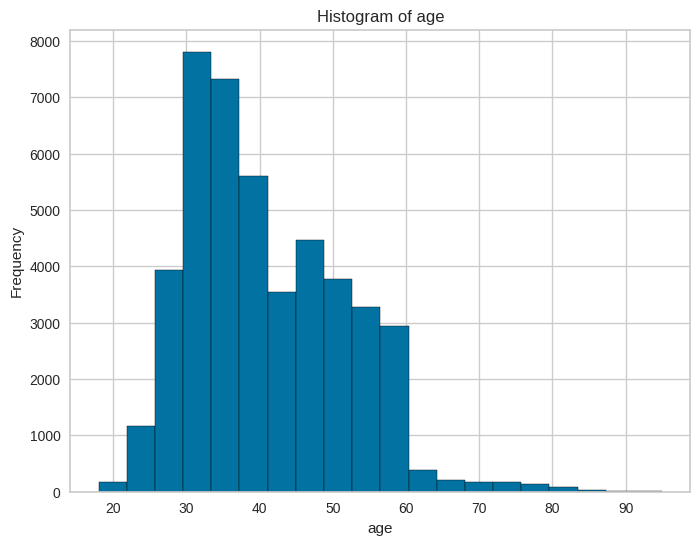

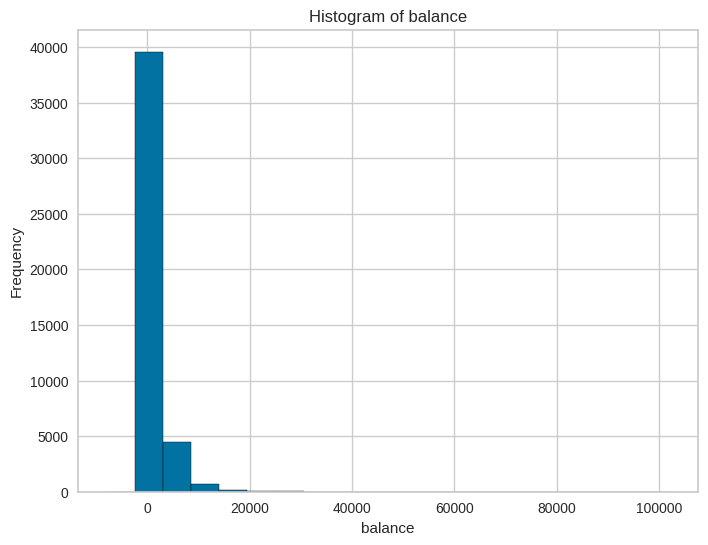

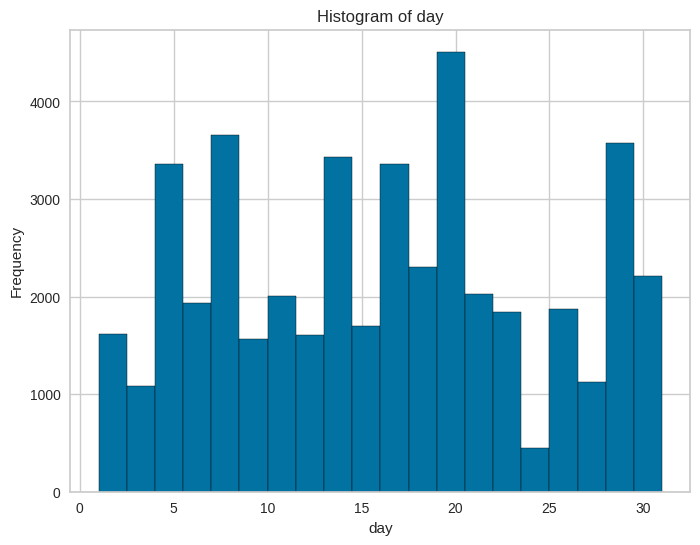

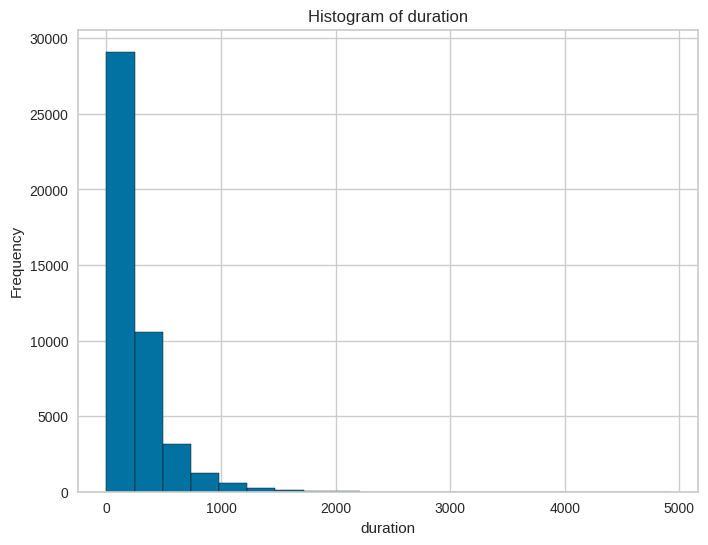

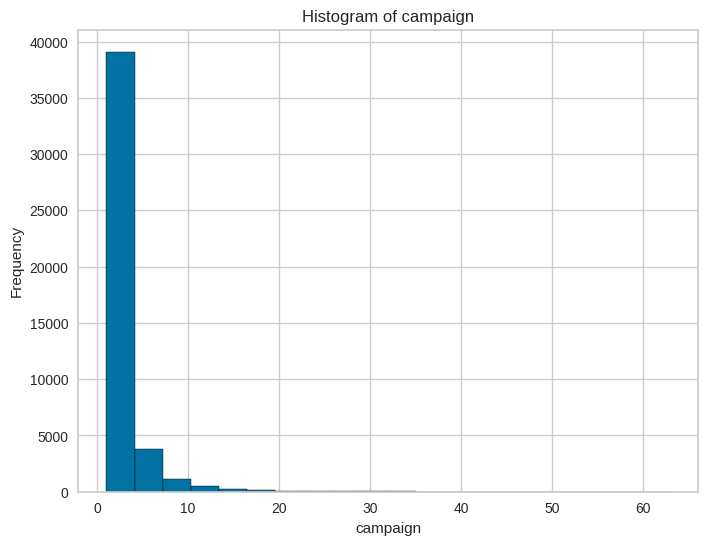

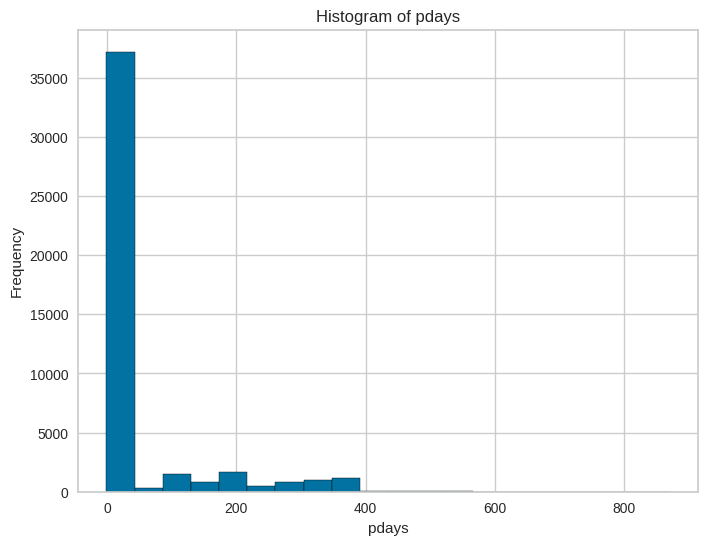

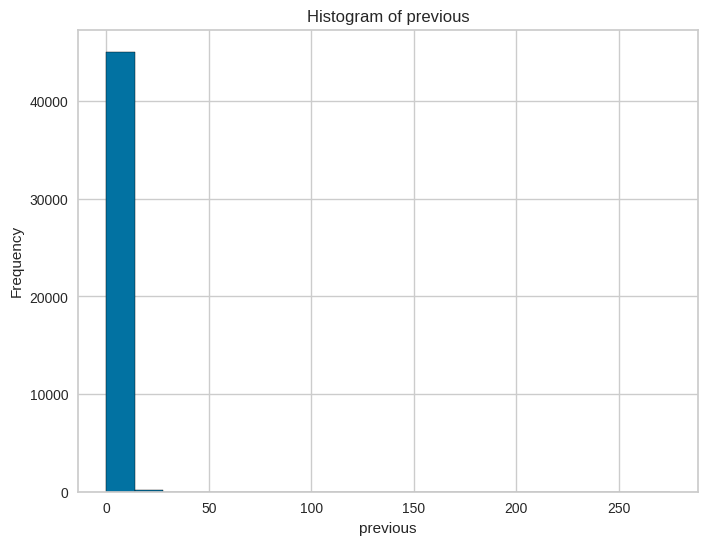

In [ ]:
# Memilih kolom numerik untuk plot histogram
numerical_cols = df.select_dtypes(include=['number'])

# Membuat histogram untuk setiap kolom numerik
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

# Menentukan kolom kategorikal yang akan di-encode
categorical_cols = ['job']

# Buat objek OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Lakukan encoding pada kolom kategorikal
encoded_data = encoder.fit_transform(df[categorical_cols])

# Buat DataFrame baru dari data yang telah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Reset indeks sebelum concat
df_numeric = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

# Gabungkan DataFrame dengan ignore_index=True
data_encoded = pd.concat([df_numeric, encoded_df], axis=1)

# Buat objek MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom numerik yang akan distandarisasi
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Lakukan scaling pada kolom numerik
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])  # Terapkan MinMaxScaler

# Menampilkan 5 baris pertama dari data yang sudah di-encode
data_encoded

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.519481,0.092259,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.337662,0.073067,0.030704,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.194805,0.072822,0.015453,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.376623,0.086476,0.018707,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.194805,0.072812,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.198658,0.032258,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,0.688312,0.088501,0.092721,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45208,0.701299,0.124689,0.229158,0.064516,0.212156,0.010909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45209,0.506494,0.078868,0.103294,0.048387,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [37]:
# Inisialisasi model KMeans dengan jumlah cluster yang ditentukan
kmeans = KMeans(n_clusters=6, random_state=42)

# Latih model dengan data_encoded
kmeans.fit(data_encoded)

# Dapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Tambahkan label cluster ke DataFrame data_encoded
data_encoded['cluster'] = labels

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [38]:
from sklearn.metrics import silhouette_score

# Assuming you have your data in 'X' and cluster labels in 'labels'
silhouette_avg = silhouette_score(data_encoded, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7555824176130589


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have your data in 'X' and cluster labels in 'labels'
silhouette_avg = silhouette_score(data_encoded, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7404002813120782


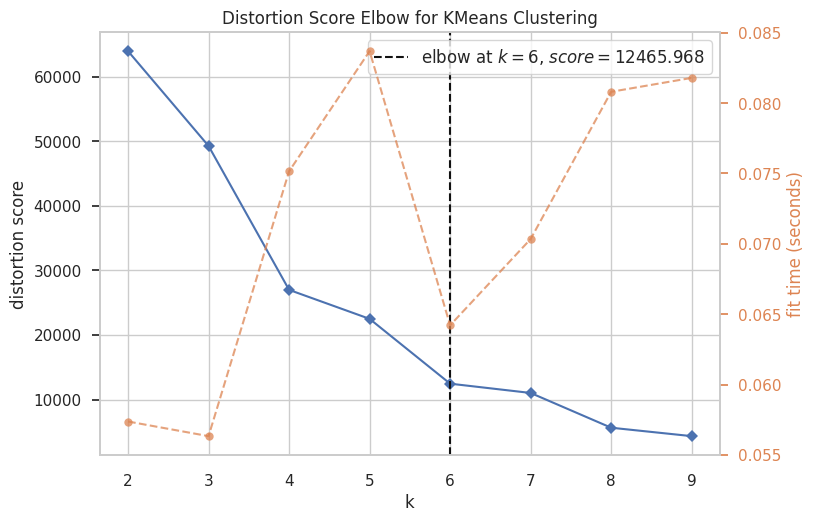

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(data_encoded)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [15]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selection(data, threshold=0.0):
    """
    Melakukan feature selection dengan Variance Threshold.

    Args:
        data: DataFrame atau array data.
        threshold: Nilai ambang batas variansi. Fitur dengan variansi di bawah ambang batas akan dihapus.

    Returns:
        DataFrame atau array data dengan fitur yang dipilih.
        List nama fitur yang dipilih.
    """

    # Buat objek VarianceThreshold
    selector = VarianceThreshold(threshold=threshold)

    # Fit dan transform data
    data_selected = selector.fit_transform(data)

    # Dapatkan nama fitur yang dipilih
    selected_features = data.columns[selector.get_support(indices=True)].tolist()

    # Jika data adalah DataFrame, ubah data_selected menjadi DataFrame dengan nama kolom yang dipilih
    if isinstance(data, pd.DataFrame):
        data_selected = pd.DataFrame(data_selected, columns=selected_features, index=data.index)

    return data_selected, selected_features

numerical_df = df.select_dtypes(include=['number'])

from sklearn.feature_selection import VarianceThreshold

# Asumsikan Anda ingin menghapus fitur dengan varians di bawah 0.1
selector = VarianceThreshold(threshold=0.1)

# Fit dan transform pada DataFrame numerik
data_selected = selector.fit_transform(numerical_df)

# Dapatkan nama fitur yang dipilih
selected_features = numerical_df.columns[selector.get_support(indices=True)].tolist()

# Buat DataFrame baru dengan fitur yang dipilih
selected_df = pd.DataFrame(data_selected, columns=selected_features, index=df.index)

# Contoh penggunaan
data_selected, selected_features = variance_threshold_selection(selected_df, threshold=0.1)  # Ganti df dengan data Anda

print("Fitur yang Dipilih:", selected_features)

Fitur yang Dipilih: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [43]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

# Menentukan kolom kategorikal yang akan di-encode
categorical_cols = ['education']

# Buat objek OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Lakukan encoding pada kolom kategorikal
encoded_data = encoder.fit_transform(df[categorical_cols])

# Buat DataFrame baru dari data yang telah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Reset indeks sebelum concat
df_numeric = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

# Gabungkan DataFrame dengan ignore_index=True
df_encoded = pd.concat([df_numeric, encoded_df], axis=1)

# Buat objek MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom numerik yang akan distandarisasi
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Lakukan scaling pada kolom numerik
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])  # Terapkan MinMaxScaler

# Menampilkan data yang sudah di-encode
df_encoded

,age,balance,day,duration,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000,0.0,0.0,1.0,0.0
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000,1.0,0.0,0.0,0.0
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909,0.0,1.0,0.0,0.0
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000,0.0,1.0,0.0,0.0


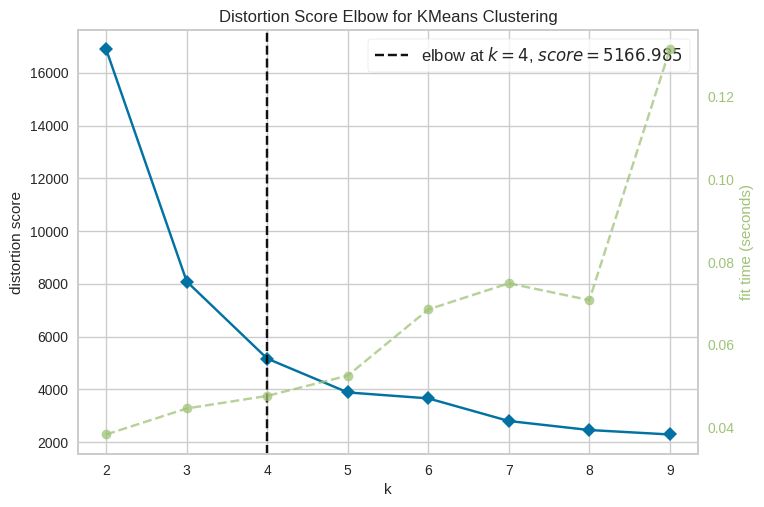

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_encoded)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [44]:
# Inisialisasi model KMeans dengan jumlah cluster yang ditentukan
kmeans = KMeans(n_clusters=5, random_state=42)

# Latih model dengan df_encoded
kmeans.fit(df_encoded)

# Dapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Tambahkan label cluster ke DataFrame df_encoded
df_encoded['cluster'] = labels

In [45]:
from sklearn.metrics import silhouette_score

# Assuming you have your data in 'X' and cluster labels in 'labels'
silhouette_avg = silhouette_score(df_encoded, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7933182381974399


In [46]:
# Tambahkan kolom 'cluster' ke DataFrame asli (df)
df['cluster'] = kmeans.labels_

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

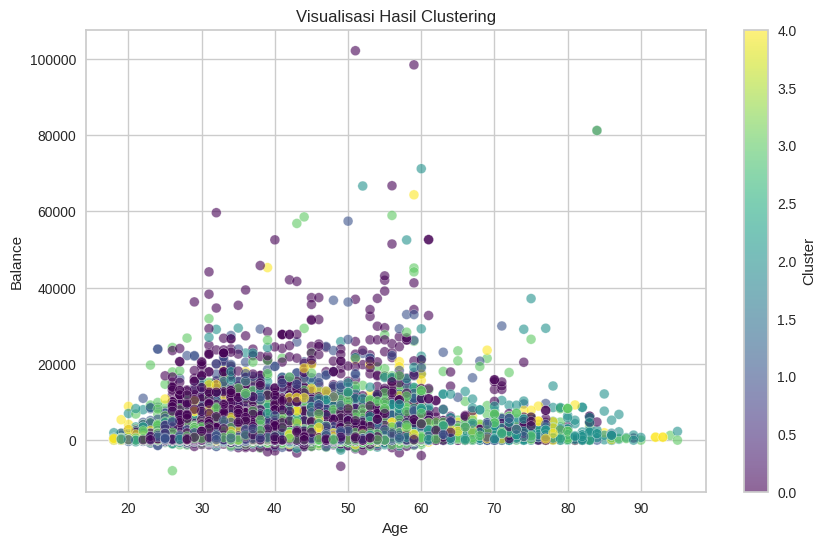

In [48]:
import matplotlib.pyplot as plt

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['balance'], c=df['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.title('Visualisasi Hasil Clustering')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.colorbar(label='Cluster')  # Menambahkan colorbar untuk menunjukkan label cluster
plt.show()

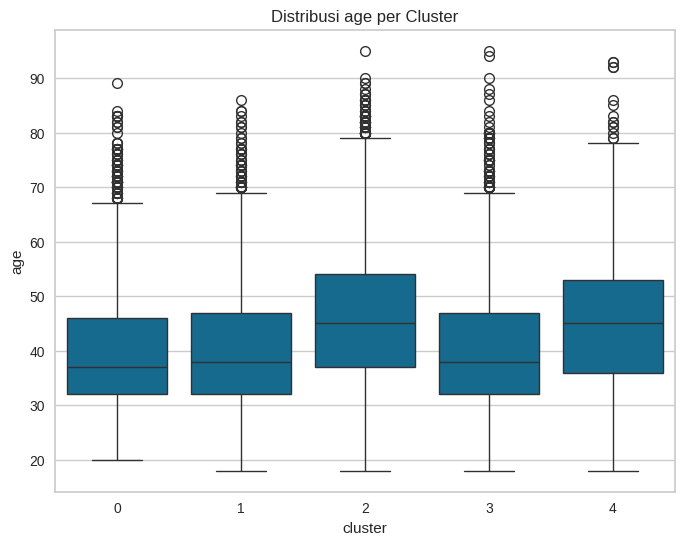

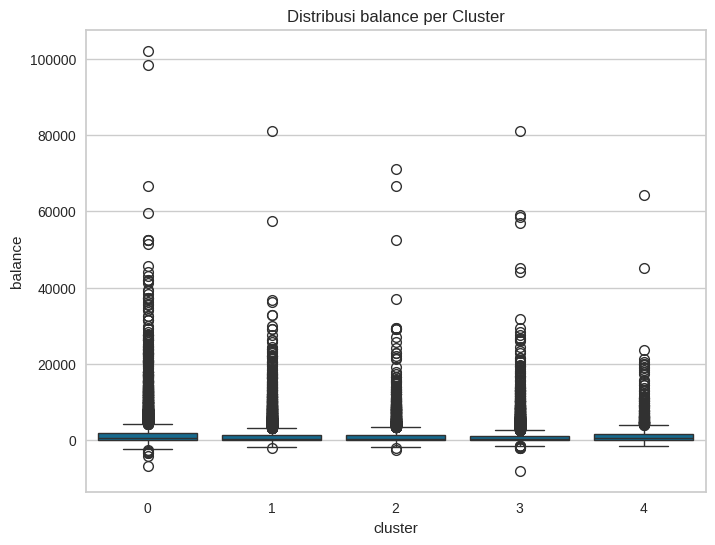

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop melalui setiap fitur numerik
for feature in ['age', 'balance']:  # Ganti dengan fitur numerik Anda
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.show()

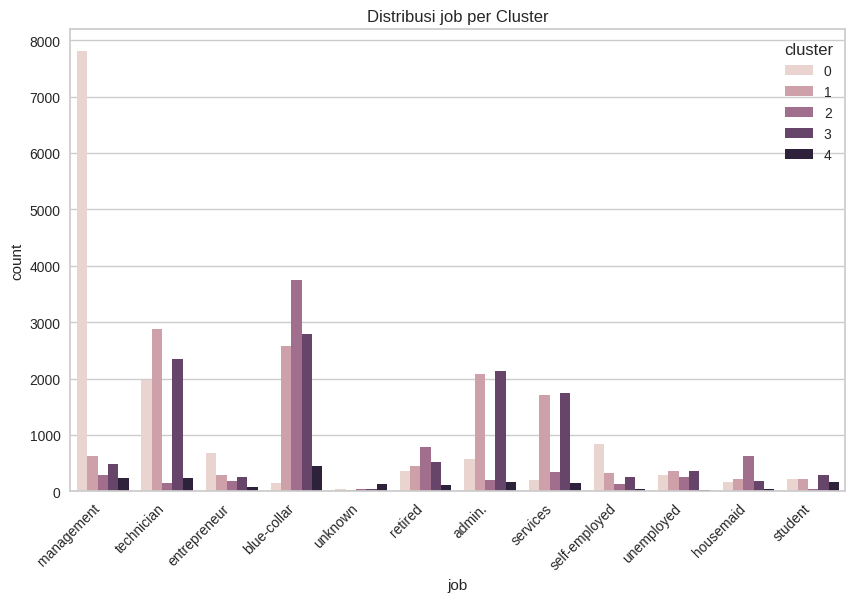

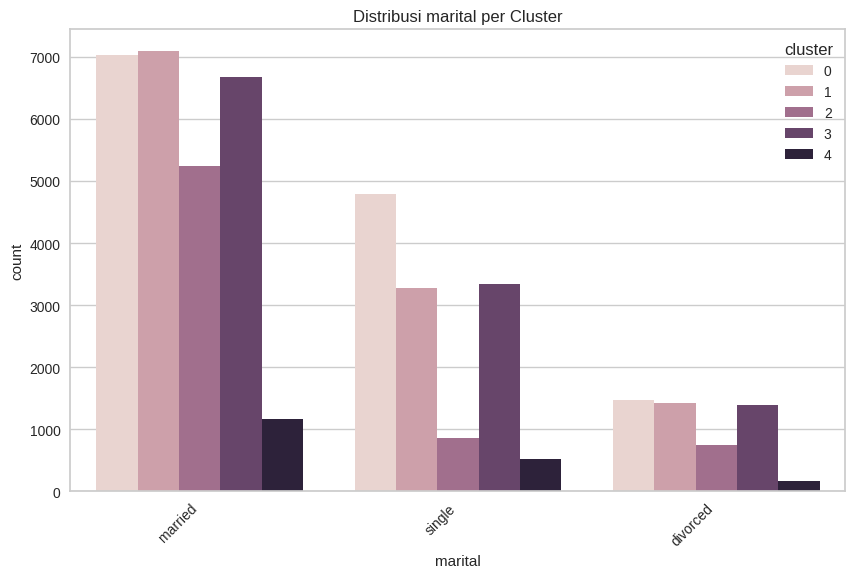

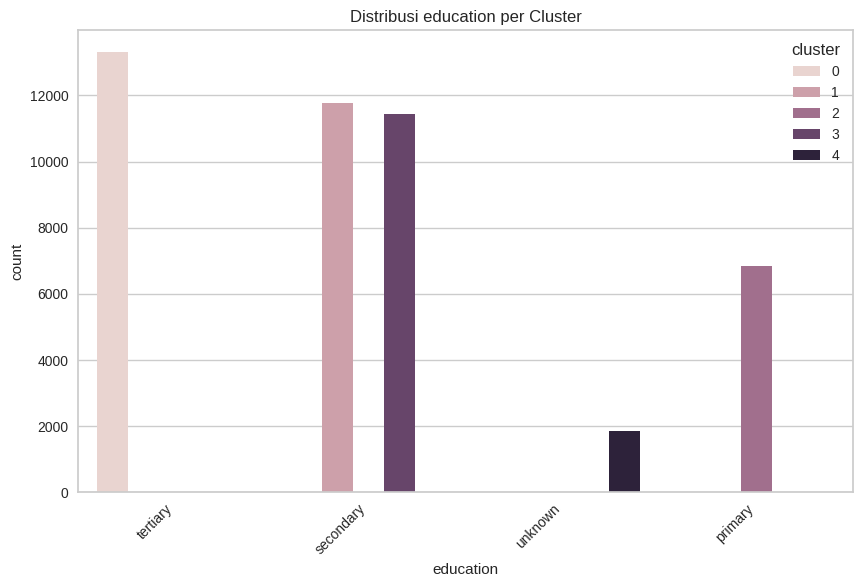

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop melalui setiap fitur kategorikal
for feature in ['job', 'marital', 'education']:  # Ganti dengan fitur kategorikal Anda
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='cluster', data=df)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x jika diperlukan
    plt.show()

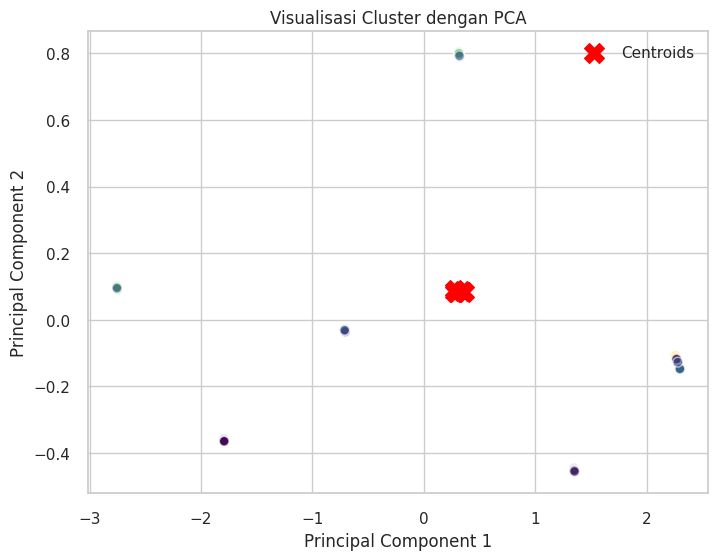

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Inisialisasi PCA dengan 2 komponen
pca = PCA(n_components=2)

# Transformasi data dengan PCA
principalComponents = pca.fit_transform(data_encoded)

# Buat DataFrame untuk visualisasi
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']  # Tambahkan label cluster

# Visualisasi cluster dengan centroid
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

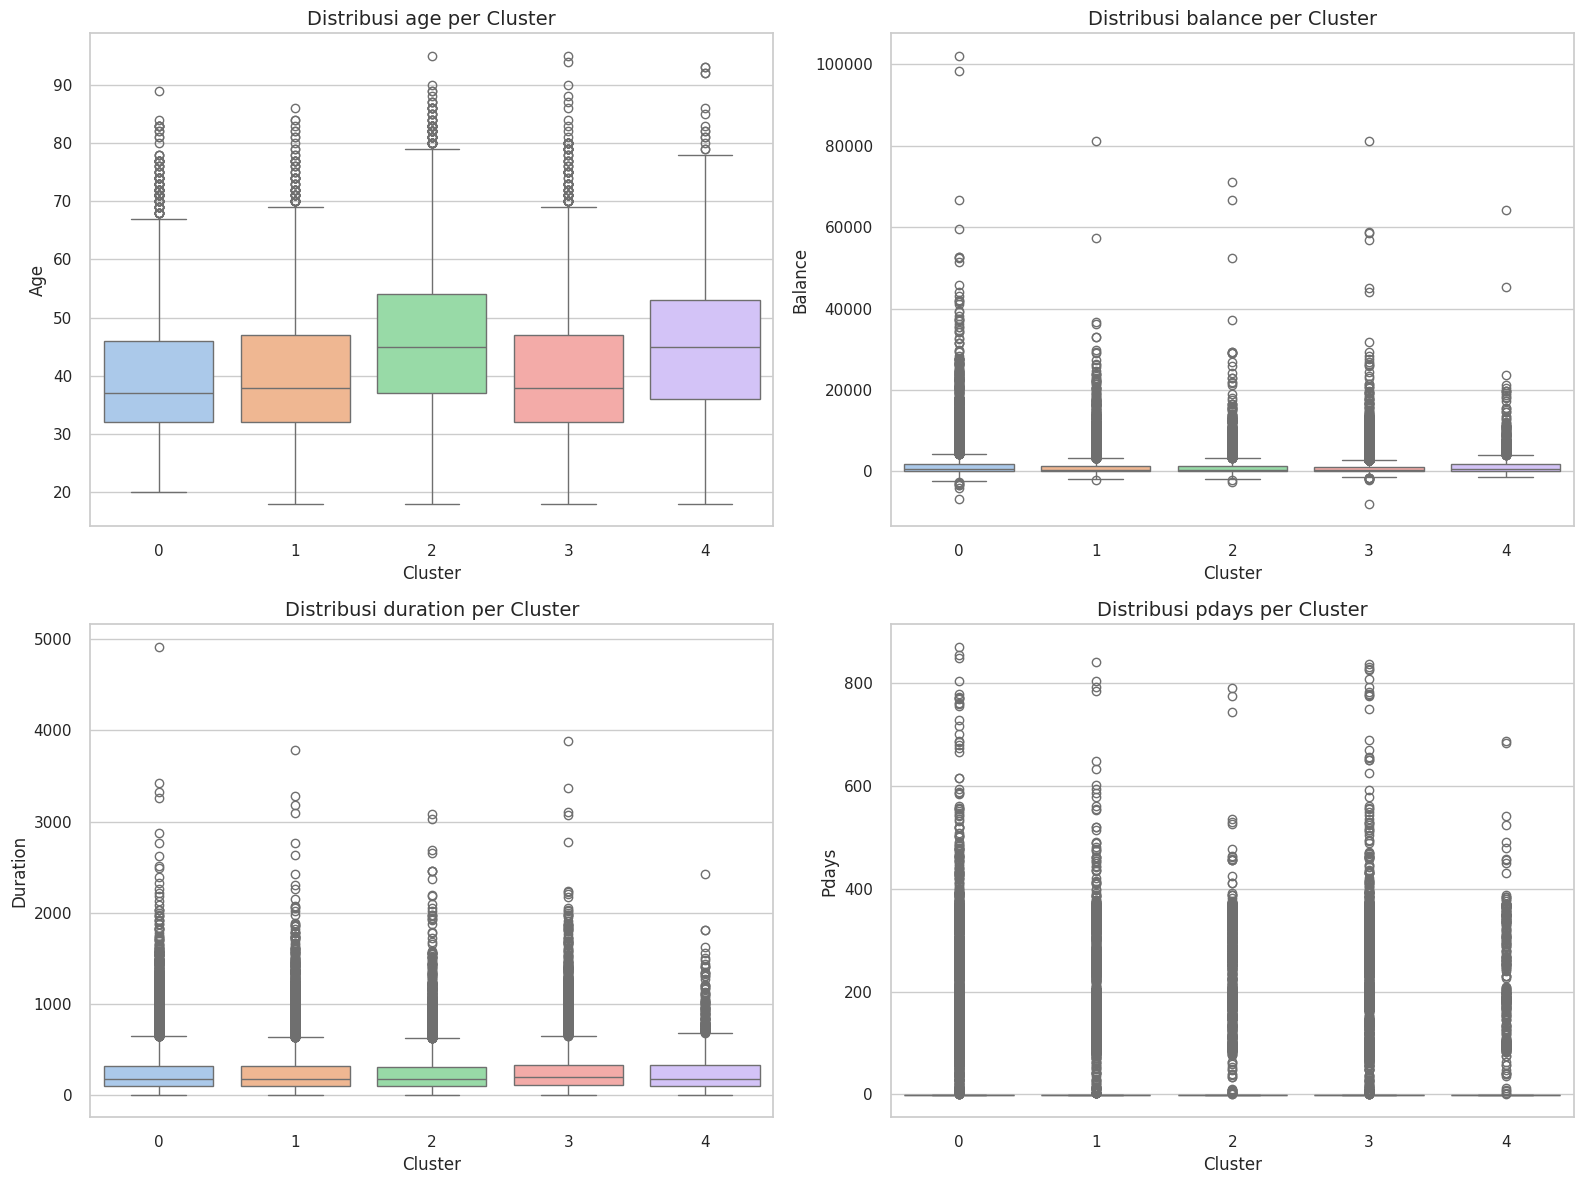

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya untuk visual yang lebih baik
sns.set(style="whitegrid")

# Kolom-kolom yang akan divisualisasikan
kolom_untuk_plot = ['age', 'balance', 'duration', 'pdays']

# Buat figure untuk plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, kolom in enumerate(kolom_untuk_plot):
    sns.boxplot(
        data=df,
        x='cluster', y=kolom, ax=axes[i],
        hue='cluster', palette='pastel', legend=False
    )
    axes[i].set_title(f'Distribusi {kolom} per Cluster', fontsize=14)
    axes[i].set_xlabel('Cluster')  # Ubah label sumbu x
    axes[i].set_ylabel(kolom.capitalize())  # Ubah label sumbu y dan kapitalisasi

plt.tight_layout()
plt.show()

In [74]:
# Kelompokkan DataFrame berdasarkan 'cluster'
clustered_data = df.groupby('cluster')

# Dapatkan statistik deskriptif untuk kolom numerik di setiap cluster
for cluster, data in clustered_data:
    print(f"Cluster {cluster}:")
    print(data.describe())  # Menampilkan statistik deskriptif untuk semua kolom numerik
    print("\n") # Memberikan baris kosong untuk pemisahan yang lebih baik

Cluster 0:
                age        balance           day      duration      campaign  \
count  13301.000000   13301.000000  13301.000000  13301.000000  13301.000000   
mean      39.593640    1758.416435     16.086535    258.518532      2.825577   
std        9.887923    3839.088305      8.462004    264.938057      3.146753   
min       20.000000   -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000     104.000000      8.000000    101.000000      1.000000   
50%       37.000000     577.000000     17.000000    176.000000      2.000000   
75%       46.000000    1804.000000     22.000000    318.000000      3.000000   
max       89.000000  102127.000000     31.000000   4918.000000     51.000000   

              pdays      previous  cluster  
count  13301.000000  13301.000000  13301.0  
mean      39.024134      0.661980      0.0  
std       95.780024      3.139468      0.0  
min       -1.000000      0.000000      0.0  
25%       -1.000000      0.000000      0.0 

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Berikut interpretasi dan kesimpulan dari masing-masing klaster berdasarkan karakteristik utama:

**Cluster 0: "Profesional Mapan"**
Karakteristik:

- Rata-rata usia: 39,6 tahun.
- Saldo rata-rata: 1.758,42 (tertinggi dibanding cluster lain).
- Durasi rata-rata panggilan: 258,52 detik.
- Loyalitas kampanye: Tingkat keberhasilan kampanye 15%, dengan hasil kampanye sebelumnya success sebesar 4,68%.
- Sebagian besar hasil kampanye sebelumnya tidak diketahui (poutcome: 80% unknown).

Kesimpulan:

- Audiens ini memiliki stabilitas finansial dan cenderung membutuhkan layanan yang lebih eksklusif.
- Loyalitas cukup baik dengan potensi untuk peningkatan jika diarahkan pada kampanye yang sesuai.

**Cluster 1: "Karyawan Menengah Aktif"**

Karakteristik:

Rata-rata usia: 39,8 tahun.
Saldo rata-rata: 1.226,94.
Durasi rata-rata panggilan: 252,10 detik.
Loyalitas kampanye: Tingkat keberhasilan kampanye 9,4%, dengan hasil kampanye sebelumnya success hanya 2,33%.
Sebagian besar hasil kampanye sebelumnya tidak diketahui (poutcome: 85,1% unknown).
Kesimpulan:

Kelompok ini memiliki pendapatan moderat dan membutuhkan pendekatan yang lebih fokus pada solusi finansial praktis.
Loyalitas terhadap kampanye cukup rendah; fokuskan pada penguatan kepercayaan melalui komunikasi yang jelas.

**Cluster 2: "Pekerja Tradisional Stabil"**

Karakteristik:

- Rata-rata usia: 45,9 tahun (tertinggi di antara semua cluster).
- Saldo rata-rata: 1.250,95.
- Durasi rata-rata panggilan: 255,93 detik.
- Loyalitas kampanye: Tingkat keberhasilan kampanye 8,6%, dengan hasil kampanye sebelumnya success hanya 1,94%.
- Sebagian besar hasil kampanye sebelumnya tidak diketahui (poutcome: 85,1% unknown).

Kesimpulan:

- Stabil dalam gaya hidup tetapi tidak mudah untuk diyakinkan oleh kampanye pemasaran.
- Kampanye harus dirancang sederhana dengan menonjolkan kebutuhan dasar dan kepraktisan.

**Cluster 3: "Kelas Menengah Dinamis"**

Karakteristik:

- Rata-rata usia: 40,1 tahun.
- Saldo rata-rata: 1.080,57 (terendah di antara semua cluster).
- Durasi rata-rata panggilan: 265,48 detik (tertinggi di antara semua cluster).
- Loyalitas kampanye: Tingkat keberhasilan kampanye 11,7%, dengan hasil kampanye sebelumnya success sebesar 3,50%.
- Sebagian besar hasil kampanye sebelumnya tidak diketahui (poutcome: 78,1% unknown).

Kesimpulan:

- Meskipun stabilitas finansial relatif lebih rendah, mereka cenderung lebih responsif terhadap kampanye.
- Pendekatan berbasis nilai (misalnya penghematan atau manfaat tambahan) dapat efektif.

**Cluster 4: "Kelompok Heterogen"**

Karakteristik:

- Rata-rata usia: 44,5 tahun.
- Saldo rata-rata: 1.526,75.
- Durasi rata-rata panggilan: 257,31 detik.
- Loyalitas kampanye: Tingkat keberhasilan kampanye 13,5%, dengan hasil kampanye sebelumnya success sebesar 4,36%.
- Sebagian besar hasil kampanye sebelumnya tidak diketahui (poutcome: 82,6% unknown).

**Kesimpulan:**

- Beragam dalam karakteristik, sehingga sulit untuk diidentifikasi secara spesifik.
- Pendekatan berbasis segmen lokal atau kampanye umum yang relevan untuk berbagai audiens dapat lebih efektif.

**Rekomendasi Umum:**

- Tingkatkan data poutcome yang unknown untuk memahami pola loyalitas lebih baik.
- Untuk cluster dengan loyalitas rendah (Cluster 1 dan 2), fokus pada edukasi manfaat kampanye.
- Untuk cluster dengan saldo tinggi (Cluster 0 dan 4), tawarkan layanan eksklusif yang meningkatkan nilai tambah.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:
df.drop(columns=['age_group'], inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,3
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,1


In [64]:
df.to_csv('clustered_data.csv', index=False)